In [1]:
import numpy as np
import random
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!
from datetime import datetime
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators_array, aux_operators_array, graphs_and_dist
import warnings
warnings.filterwarnings("ignore")
#import test_operators_12_02_2021_sem_lambda as top
#import tes_operators_22_02_2021_KM as top
#import test_operators_11_02_2021 as top
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

In [2]:
os.chdir('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado')

pasta_a_pegar = '16_09_2022_12_35'
#Indivíduo final
data_final_ind = pd.read_table('{}/final_ind.csv'.format(pasta_a_pegar), sep =',')
final_ind = np.reshape(np.array(data_final_ind), (15,3))

#Inclinação final
data_final_incl = pd.read_table('{}/incl.csv'.format(pasta_a_pegar), sep =',')
final_incl = np.reshape(np.array(data_final_incl), (2999))

#Declinação final
data_final_decl = pd.read_table('{}/decl.csv'.format(pasta_a_pegar), sep =',')
final_decl = np.reshape(np.array(data_final_decl), (2999))

#Gamma final
data_final_gamma = pd.read_table('{}/gamma.csv'.format(pasta_a_pegar), sep =',')
final_gamma = np.reshape(np.array(data_final_gamma), (2999))

#Phi final
data_final_phi = pd.read_table('{}/phi.csv'.format(pasta_a_pegar), sep =',')
final_phi = np.reshape(np.array(data_final_phi), (2999))

#Theta final
data_final_theta = pd.read_table('{}/theta.csv'.format(pasta_a_pegar), sep =',')
final_theta = np.reshape(np.array(data_final_theta), (2999))

'''#Mom final
data_final_mom = pd.read_table('{}/mom.csv'.format(pasta_a_pegar), sep =',')
final_mom = np.reshape(np.array(data_final_mom), (2999))'''



"#Mom final\ndata_final_mom = pd.read_table('{}/mom.csv'.format(pasta_a_pegar), sep =',')\nfinal_mom = np.reshape(np.array(data_final_mom), (2999))"

In [3]:
I, D = 5.0, 70.0

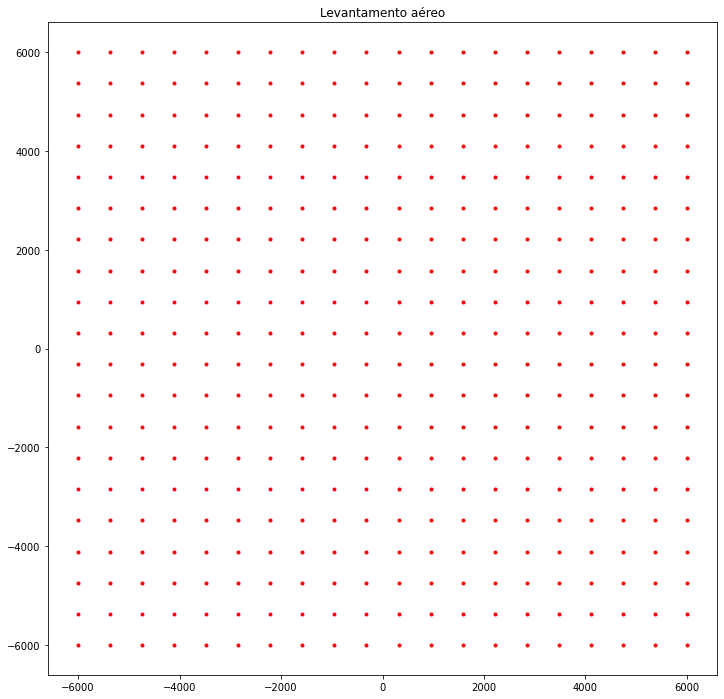

In [4]:
os.chdir('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Logfile/04_08_2022_08_45')
data_cubo = pd.read_table('data_mag.csv', sep=',')
anomaly_cubo = np.reshape(np.array(data_cubo['Anomalia Magnética(nT)']), (20,20))

acquisition = {'nx': 20,
               'ny': 20,
               'ymax': data_cubo['East(m)'].max(),
               'ymin': data_cubo['East(m)'].min(),
               'xmax': data_cubo['North(m)'].max(),
               'xmin': data_cubo['North(m)'].min(),
               'z': -50.0,
               'color': '.r'}

x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

# Plot 3D

In [5]:
def divide_param_dipolo(pop):
    coodX1 = []
    coodY1 = []
    coodZ1 = []
    incl1 = []
    decl1 = []
    mag1 = []

    for i in range(len(pop)-1):
        coodX1.append(pop[i,0])
        coodY1.append(pop[i,1])
        coodZ1.append(pop[i,2])
        incl1.append(pop[len(pop)-1,0])
        decl1.append(pop[len(pop)-1,1])
        mag1.append(pop[len(pop)-1,2])
    return coodX1, coodY1, coodZ1, incl1, decl1, mag1

coodX1, coodY1, coodZ1, incl1, decl1, mag1 = divide_param_dipolo(final_ind)

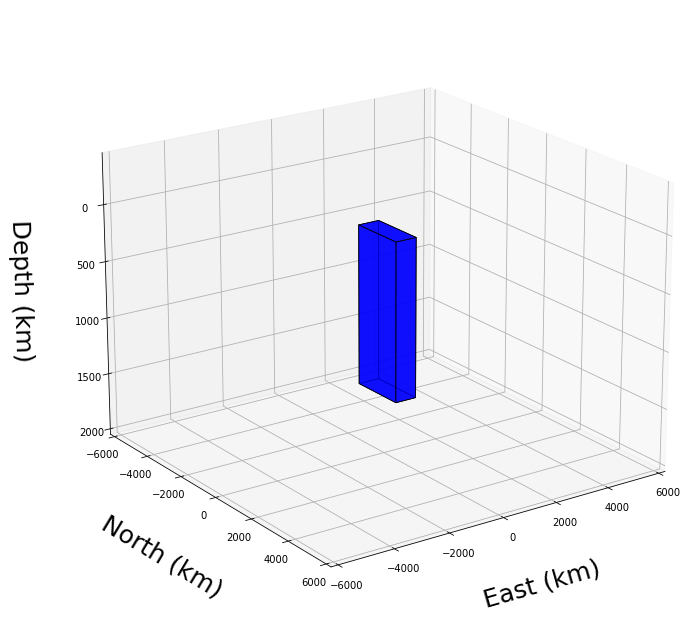

In [6]:
# coordenadas dos vertices (corners) do prisma, em metros:
x1,x2  = (-250.0, 500.0)
y1,y2 = (-1000.0, 1000.0)
z1,z2  = (100.0, 1500.0)   # z eh positivo para baixo!
deltaz = 600.0
deltay = 1000.0
deltax = 1500.0
incl = 'positivo'

dic = {'n': 1,
       'x': [x1, x2],
       'y': [y1, y2],
       'z': [z1, z2],
       'deltay': deltay,
       'deltaz': deltaz,
       'deltax': deltax,
       'incl': incl,
       'merg': 'x'}

pointx, pointy, pointz = plot_3D.creat_point(**dic)


dic1 = {'x': [pointx[0], pointx[1]],
        'y': [pointy[0], pointy[1]],
        'z': [pointz[0], pointz[1]]}

'''dic2 = {'x': [pointx[2], pointx[3]],
        'y': [pointy[2], pointy[3]],
        'z': [pointz[2], pointz[3]]}

dic3 = {'x': [pointx[4], pointx[5]],
        'y': [pointy[4], pointy[5]],
        'z': [pointz[4], pointz[5]]}

dic4 = {'x': [pointx[6], pointx[7]],
        'y': [pointy[6], pointy[7]],
        'z': [pointz[6], pointz[7]]}'''

'''dic5 = {'x': [pointx[8], pointx[9]],
        'y': [pointy[8], pointy[9]],
        'z': [pointz[8], pointz[9]]}'''
#----------------------------------------------------------------------------------------------------#
vert1 =  plot_3D.vert_point(dic1)
'''vert2 =  plot_3D.vert_point(dic2)
vert3 =  plot_3D.vert_point(dic3)
vert4 =  plot_3D.vert_point(dic4)
#vert5 =  plot_3D.vert_point(dic5)'''
#----------------------------------------------------------------------------------------------------#
color = 'b'
size = [9, 10]
view = [200,305]
#----------------------------------------------------------------------------------------------------#
prism_1 = plot_3D.plot_prism(vert1, color)
'''prism_2 = plot_3D.plot_prism(vert2, color)
prism_3 = plot_3D.plot_prism(vert3, color)
prism_4 = plot_3D.plot_prism(vert4, color)
#prism_5 = plot_3D.plot_prism(vert5, color)'''
#----------------------------------------------------------------------------------------------------#
prisma1 = {'n': 1,
         'prisma': [prism_1]}#, prism_2,prism_3, prism_4]} #prism_5]}#, prism_2,prism_3]}

plot_3D.plot_obs_3d(prisma1, size, view, x, y, pointz)

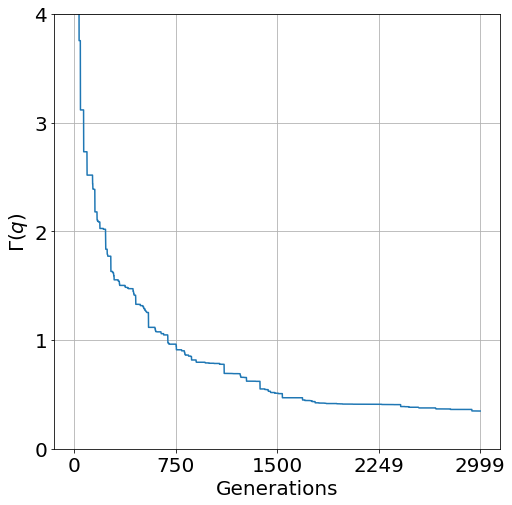

In [12]:
n_fit = len(final_gamma)
x_gama = np.linspace(0, n_fit, n_fit)
fig = plt.figure(figsize=(8, 8))
plt.plot(x_gama, final_gamma)
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('$\Gamma(q)$', fontsize=20)
plt.xticks(np.linspace(x_gama.min(), x_gama.max(), 5), fontsize = 20)
plt.yticks(np.linspace(0, 4.0, 5), fontsize = 20)
plt.ylim(0, 4.0)
plt.grid()
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/17_09_2022_10_10/gamma.png", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/17_09_2022_10_10/gamma.pdf", dpi=300, bbox_inches='tight')
plt.show()

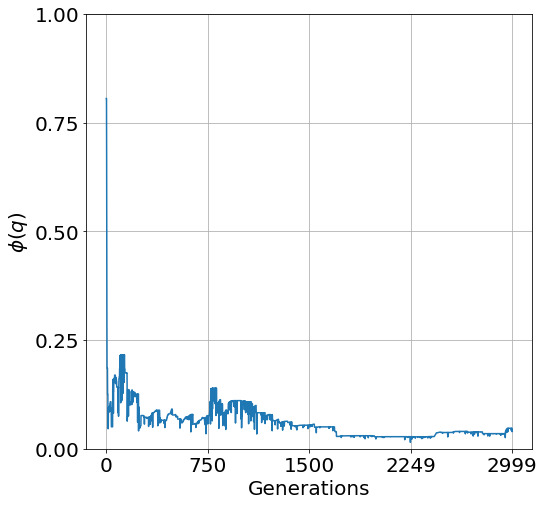

In [15]:
fig = plt.figure(figsize=(8, 8))
plt.plot(x_gama, final_phi)
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('$\phi(q)$', fontsize=20)
plt.xticks(np.linspace(x_gama.min(), x_gama.max(), 5), fontsize = 20)
plt.yticks(np.linspace(0, 1.0, 5), fontsize = 20)
plt.ylim(0, 1.0)
plt.grid()
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/17_09_2022_10_10/gamma.png", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/17_09_2022_10_10/gamma.pdf", dpi=300, bbox_inches='tight')
plt.show()